# Sparkify Project Workspace
This workspace contains a subset (based on the IBM subset) of the full dataset. Since my company does not use Spark and I prefere coding normal I used the bigger IBM subset and coded without spark. 

Importing libaries and subset

In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import json
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
df=pd.read_json(r'medium-sparkify-event-data.json', lines=True)

In [3]:
#df=pd.read_json(r'mini_sparkify_event_data.json', lines=True)

In [4]:
df.head()

artist       auth firstName gender  itemInSession  lastName  \
0      Martin Orford  Logged In    Joseph      M             20   Morales   
1  John Brown's Body  Logged In    Sawyer      M             74    Larson   
2            Afroman  Logged In  Maverick      M            184  Santiago   
3                NaN  Logged In  Maverick      M            185  Santiago   
4         Lily Allen  Logged In    Gianna      F             22    Campos   

      length level                              location method      page  \
0  597.55057  free                    Corpus Christi, TX    PUT  NextSong   
1  380.21179  free  Houston-The Woodlands-Sugar Land, TX    PUT  NextSong   
2  202.37016  paid         Orlando-Kissimmee-Sanford, FL    PUT  NextSong   
3        NaN  paid         Orlando-Kissimmee-Sanford, FL    PUT    Logout   
4  194.53342  paid                            Mobile, AL    PUT  NextSong   

   registration  sessionId                song  status             ts  \
0  1.532064e+12        292       Grand Designs     200  1538352011000   
1  1.538070e+12         97               Bulls     200  1538352025000   
2  1.535953e+12        178  Because I Got High     200  1538352118000   
3  1.535953e+12        178                 NaN     307  1538352119000   
4  1.535931e+12        245  Smile (Radio Edit)     200  1538352124000   

                                           userAgent userId  
0  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...    293  
1  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...     98  
2  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...    179  
3  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...    179  
4  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...    246

Theory: possible churn indicators based on dataset
1. ration thumbs up vs down or count e.g. to identify if he liked the music available or not
2. hours logged in  e.g. did he listened to all songs already?
3. Songs played & author e.g. does he enjoy a lot of music or just one album 
4. gender differences 

Indicators that could be beneficial: 
1. Thumbs up 
2. Thumbs down 
3. Songs played
4. Gender
5. Artists
6. total length 
7. level

# Exploring data in more detail

For exploring the data we will do multiple steps: 

0. Handling NaNs
1. Check some more features for unique values to understand the sample even better 
2. Define what is churn in our dataset based on the understanding we have now 
3. Drop unnecessary data columns (based on what defined so far and on what the goal is and the described indicators at the top
4. checking the remaining data and visualize it (especially the important features to figure out if there are differences between churned users and not churned users
5. Build the different models and use them to predict churn 

## 0.Let's have a first look at the dataset & handle NaNs

Unique User in dataset 

In [5]:
df['userId'].nunique()

449

Checking Data and content 

In [6]:
df.groupby('lastName').count().head()

artist  auth  firstName  gender  itemInSession  length  level  \
lastName                                                                   
Abbott         89   131        131     131            131      89    131   
Adams          11    17         17      17             17      11     17   
Aguilar       775   998        998     998            998     775    998   
Alexander    2134  2622       2622    2622           2622    2134   2622   
Allen        4173  5076       5076    5076           5076    4173   5076   

           location  method  page  registration  sessionId  song  status  \
lastName                                                                   
Abbott          131     131   131           131        131    89     131   
Adams            17      17    17            17         17    11      17   
Aguilar         998     998   998           998        998   775     998   
Alexander      2622    2622  2622          2622       2622  2134    2622   
Allen          5076    5076  5076          5076       5076  4173    5076   

             ts  userAgent  userId  
lastName                            
Abbott      131        131     131  
Adams        17         17      17  
Aguilar     998        998     998  
Alexander  2622       2622    2622  
Allen      5076       5076    5076

In [7]:
df.groupby('auth').count()

artist  firstName  gender  itemInSession  lastName  length  \
auth                                                                     
Cancelled        0         99      99             99        99       0   
Guest            0          0       0             94         0       0   
Logged In   432877     527906  527906         527906    527906  432877   
Logged Out       0          0       0          15606         0       0   

             level  location  method    page  registration  sessionId    song  \
auth                                                                            
Cancelled       99        99      99      99            99         99       0   
Guest           94         0      94      94             0         94       0   
Logged In   527906    527906  527906  527906        527906     527906  432877   
Logged Out   15606         0   15606   15606             0      15606       0   

            status      ts  userAgent  userId  
auth                                           
Cancelled       99      99         99      99  
Guest           94      94          0      94  
Logged In   527906  527906     527906  527906  
Logged Out   15606   15606          0   15606

In [8]:
pd.crosstab(index=df["page"], columns="count")

col_0                       count
page                             
About                        1855
Add Friend                   8087
Add to Playlist             12349
Cancel                         99
Cancellation Confirmation      99
Downgrade                    3811
Error                         519
Help                         3150
Home                        27412
Login                        6011
Logout                       5990
NextSong                   432877
Register                       11
Roll Advert                  7773
Save Settings                 585
Settings                     2964
Submit Downgrade              117
Submit Registration             4
Submit Upgrade                287
Thumbs Down                  4911
Thumbs Up                   23826
Upgrade                       968

In [9]:
df.isna().sum()

artist           110828
auth                  0
firstName         15700
gender            15700
itemInSession         0
lastName          15700
length           110828
level                 0
location          15700
method                0
page                  0
registration      15700
sessionId             0
song             110828
status                0
ts                    0
userAgent         15700
userId                0
dtype: int64

In [10]:
df.head(286496) 

artist        auth  firstName gender  \
0                                 Martin Orford   Logged In     Joseph      M   
1                             John Brown's Body   Logged In     Sawyer      M   
2                                       Afroman   Logged In   Maverick      M   
3                                           NaN   Logged In   Maverick      M   
4                                    Lily Allen   Logged In     Gianna      F   
5                                    Carter USM   Logged In      Sofia      F   
6                                           NaN  Logged Out        NaN    NaN   
7                                           NaN  Logged Out        NaN    NaN   
8                                           NaN  Logged Out        NaN    NaN   
9                                           NaN  Logged Out        NaN    NaN   
10                                          NaN   Logged In   Maverick      M   
11                                    Aerosmith   Logged In      Lacey      F   
12                                          NaN   Logged In      Colin      M   
13                                Amy Winehouse   Logged In      Colin      M   
14      Drake / Kanye West / Lil Wayne / Eminem   Logged In      Sofia      F   
15                                    Bob Dylan   Logged In     Gianna      F   
16                                 The Bar-Kays   Logged In   Maverick      M   
17                                   Black Kids   Logged In     Payton      F   
18                                          NaN   Logged In      Sofia      F   
19                                          NaN   Logged In   Maverick      M   
20                                  Chris Isaak   Logged In     Sawyer      M   
21                                   Crazy Frog   Logged In      Lacey      F   
22                                          NaN   Logged In     Sawyer      M   
23                                  The Strokes   Logged In      Colin      M   
24                                          NaN   Logged In      Colin      M   
25                                     Old 97's   Logged In   Maverick      M   
26                                       Camila   Logged In     Sawyer      M   
27                                   The Script   Logged In     Gianna      F   
28                                 Beastie Boys   Logged In     Payton      F   
29                                    Tungtvann   Logged In      Lacey      F   
...                                         ...         ...        ...    ...   
286466                      Simian Mobile Disco   Logged In   Giovanni      M   
286467                          Alliance Ethnik   Logged In       Adam      M   
286468                                     NOFX   Logged In      Jaxon      M   
286469                             Jason Derulo   Logged In     Sophia      F   
286470                                Shinedown   Logged In     Karina      F   
286471                                 No Mercy   Logged In      Carly      F   
286472                                  Skillet   Logged In      Davis      M   
286473                                Ding Dong   Logged In    Everett      M   
286474                              Josh Turner   Logged In     Dillyn      F   
286475              Jason Mraz & Colbie Caillat   Logged In  Christian      M   
286476                                   Ativin   Logged In      Colin      M   
286477                             Jimi Hendrix   Logged In      Kaleb      M   
286478                             Tonton David   Logged In      Riley      F   
286479                                Tungtvann   Logged In       Kyle      M   
286480                            Avril Lavigne   Logged In      Molly      F   
286481                                     Cake   Logged In      Erick      M   
286482                                Kim Leoni   Logged In      Jaxon      M   
286483                                      NaN   Logged In      Erick  

Finding: looks like we have NAN even if it is not shown (e.g. line 286496 - userId is empty)

In [11]:
# some have no info but are not listed as nan, so lets make it visible
df=df.replace(r'', np.nan, regex=True)

In [12]:
df['Name'] = df['firstName'].str.cat(df['lastName'],sep=" ")

In [13]:
dict4=pd.Series(df.Name.values,index=df.userId).to_dict()

In [14]:
# filling User ID 
df['userId']=df['userId'].fillna(df['Name'].map(dict4))

In [15]:
df.isna().sum()

artist           110828
auth                  0
firstName         15700
gender            15700
itemInSession         0
lastName          15700
length           110828
level                 0
location          15700
method                0
page                  0
registration      15700
sessionId             0
song             110828
status                0
ts                    0
userAgent         15700
userId            15700
Name              15700
dtype: int64

Lets continue understanding the data

In [16]:
df.groupby('auth').describe()

itemInSession                                                   \
                   count        mean         std  min   25%   50%     75%   
auth                                                                        
Cancelled           99.0   92.131313  100.989861  3.0  23.5  55.0  118.50   
Guest               94.0   10.053191   10.837378  0.0   2.0   6.0   14.75   
Logged In       527906.0  107.781929  116.867448  0.0  27.0  68.0  148.00   
Logged Out       15606.0   91.898885  110.851603  0.0  15.0  53.0  128.00   

                      length                  ...      status         \
               max     count        mean      ...         75%    max   
auth                                          ...                      
Cancelled    460.0       0.0         NaN      ...       200.0  200.0   
Guest         38.0       0.0         NaN      ...       200.0  404.0   
Logged In   1005.0  432877.0  248.664593      ...       200.0  404.0   
Logged Out   925.0       0.0         NaN      ...       307.0  404.0   

                  ts                                                          \
               count          mean           std           min           25%   
auth                                                                           
Cancelled       99.0  1.540849e+12  1.576659e+09  1.538401e+12  1.539149e+12   
Guest           94.0  1.542194e+12  1.216307e+09  1.538790e+12  1.541982e+12   
Logged In   527906.0  1.540967e+12  1.481215e+09  1.538352e+12  1.539723e+12   
Logged Out   15606.0  1.540876e+12  1.505522e+09  1.538352e+12  1.539608e+12   

                                                      
                     50%           75%           max  
auth                                                  
Cancelled   1.541087e+12  1.542132e+12  1.543583e+12  
Guest       1.542867e+12  1.542868e+12  1.543613e+12  
Logged In   1.541007e+12  1.542178e+12  1.543622e+12  
Logged Out  1.540915e+12  1.542105e+12  1.543622e+12  

[4 rows x 48 columns]

Finding: 
After logout no information (e.g. length) and a lot of NaNs (see also line 14)
Sum NaNs= Sum of LoggedOut + Sum of Guests

Two Options for NaN:
1. Delete data because it's a lot data after logout 
2. forward fill missing information

I will  delete the NaN data because we are looking at churn. Users that are not logged-in and/or guests can't churn, therefore these data should not be useful for prediction when users are churning (based on this data set). 

-> Additional Value of ff is low.

I will not delete all NaNs but only for userId and sessionId because we have to check if we could use it later on. I prefer to not delete to much data to early. 

In [17]:
df=df.dropna(how='any', subset=['userId', "sessionId"])
df.isna().sum()

artist           95128
auth                 0
firstName            0
gender               0
itemInSession        0
lastName             0
length           95128
level                0
location             0
method               0
page                 0
registration         0
sessionId            0
song             95128
status               0
ts                   0
userAgent            0
userId               0
Name                 0
dtype: int64

## 1. Understand data

In [18]:
df['status'].unique()

array([200, 307, 404])

In [19]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [20]:
df['level'].unique()

array(['free', 'paid'], dtype=object)

In [21]:
df['artist'].unique()

array(['Martin Orford', "John Brown's Body", 'Afroman', ...,
       'Hot Club Of Cowtown',
       "Fun Lovin' Criminals Featuring Ian McCulloch", 'Armand Amar'], dtype=object)

In [22]:
df['page'].unique()

array(['NextSong', 'Logout', 'Home', 'Downgrade', 'Add to Playlist',
       'Roll Advert', 'Thumbs Up', 'Help', 'Thumbs Down', 'Add Friend',
       'Settings', 'Save Settings', 'Upgrade', 'About', 'Submit Downgrade',
       'Cancel', 'Cancellation Confirmation', 'Submit Upgrade', 'Error'], dtype=object)

## 2. Define Churn

In [23]:
df.describe()

itemInSession         length  registration      sessionId  \
count  528005.000000  432877.000000  5.280050e+05  528005.000000   
mean      107.778995     248.664593  1.535523e+12    2042.980182   
std       116.864787      98.412670  3.078725e+09    1433.998149   
min         0.000000       0.783220  1.509854e+12       1.000000   
25%        27.000000     199.392200  1.534368e+12     632.000000   
50%        68.000000     234.004440  1.536556e+12    1973.000000   
75%       148.000000     276.793020  1.537612e+12    3310.000000   
max      1005.000000    3024.665670  1.543074e+12    4808.000000   

              status            ts  
count  528005.000000  5.280050e+05  
mean      209.091062  1.540967e+12  
std        30.148778  1.481233e+09  
min       200.000000  1.538352e+12  
25%       200.000000  1.539723e+12  
50%       200.000000  1.541007e+12  
75%       200.000000  1.542178e+12  
max       404.000000  1.543622e+12

In [24]:
df['page'].unique()

array(['NextSong', 'Logout', 'Home', 'Downgrade', 'Add to Playlist',
       'Roll Advert', 'Thumbs Up', 'Help', 'Thumbs Down', 'Add Friend',
       'Settings', 'Save Settings', 'Upgrade', 'About', 'Submit Downgrade',
       'Cancel', 'Cancellation Confirmation', 'Submit Upgrade', 'Error'], dtype=object)

I define that a user is churning when a customer confirms cancellation. I don't use here the Submit Downgrade because I would have to control for reupgrade and users that first downgrade and later cancle. Otherwise a user could have multiple churn events and change the overall churn score 

In [25]:
dict={'NextSong':0, 'Add to Playlist':0, 'Roll Advert':0, 'Thumbs Up':0,
       'Downgrade':0, 'Thumbs Down':0, 'Home':0, 'Logout':0, 'Help':0, 'Login':0,
       'Upgrade':0, 'Add Friend':0, 'About':0, 'Settings':0, 'Submit Upgrade':0,
       'Submit Downgrade':0, 'Error':0, 'Save Settings':0, 'Cancel':0,
       'Cancellation Confirmation':1, 'Register':0, 'Submit Registration':0}
dict

{'NextSong': 0,
 'Add to Playlist': 0,
 'Roll Advert': 0,
 'Thumbs Up': 0,
 'Downgrade': 0,
 'Thumbs Down': 0,
 'Home': 0,
 'Logout': 0,
 'Help': 0,
 'Login': 0,
 'Upgrade': 0,
 'Add Friend': 0,
 'About': 0,
 'Settings': 0,
 'Submit Upgrade': 0,
 'Submit Downgrade': 0,
 'Error': 0,
 'Save Settings': 0,
 'Cancel': 0,
 'Cancellation Confirmation': 1,
 'Register': 0,
 'Submit Registration': 0}

In [26]:
df['Churn']=df['page'].map(dict)
df.head()

artist       auth firstName gender  itemInSession  lastName  \
0      Martin Orford  Logged In    Joseph      M             20   Morales   
1  John Brown's Body  Logged In    Sawyer      M             74    Larson   
2            Afroman  Logged In  Maverick      M            184  Santiago   
3                NaN  Logged In  Maverick      M            185  Santiago   
4         Lily Allen  Logged In    Gianna      F             22    Campos   

      length level                              location method      page  \
0  597.55057  free                    Corpus Christi, TX    PUT  NextSong   
1  380.21179  free  Houston-The Woodlands-Sugar Land, TX    PUT  NextSong   
2  202.37016  paid         Orlando-Kissimmee-Sanford, FL    PUT  NextSong   
3        NaN  paid         Orlando-Kissimmee-Sanford, FL    PUT    Logout   
4  194.53342  paid                            Mobile, AL    PUT  NextSong   

   registration  sessionId                song  status             ts  \
0  1.532064e+12        292       Grand Designs     200  1538352011000   
1  1.538070e+12         97               Bulls     200  1538352025000   
2  1.535953e+12        178  Because I Got High     200  1538352118000   
3  1.535953e+12        178                 NaN     307  1538352119000   
4  1.535931e+12        245  Smile (Radio Edit)     200  1538352124000   

                                           userAgent userId  \
0  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...    293   
1  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...     98   
2  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...    179   
3  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...    179   
4  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...    246   

                Name  Churn  
0     Joseph Morales      0  
1      Sawyer Larson      0  
2  Maverick Santiago      0  
3  Maverick Santiago      0  
4      Gianna Campos      0

In [27]:
df['Churn'].sum()

99

In [28]:
churn_rate=df['Churn'].sum()/df['userId'].nunique()
churn_rate

0.22098214285714285

## 3.Drop unnecessary features 

For the further analysis I will drop a couple of columns: 
1. auth - no additional information (since we dropped guests and data after log-out)
2. firstName (we have the user ID as a unique identifyer and the name should not have an effect on churn behaviour)
3. lastName (we have the user ID as a unique identifyer)
4. location - location should not have an effect on churn behaviour in general
5. method - internal information, not important for customer
6. song will be dropped later- songname is not important, only amount of songs
7. userAgent - based on the user preference and should not have an effect (only if our dev.-team did not optimise for all systems / browsers - I assume they did) 
8. Name (we have the user ID as a unique identifyer)

In [29]:
df=df.drop(['auth','firstName','lastName', 'location', 'method','userAgent', 'Name'],axis=1)
df.head(1)

artist gender  itemInSession     length level      page  \
0  Martin Orford      M             20  597.55057  free  NextSong   

   registration  sessionId           song  status             ts userId  Churn  
0  1.532064e+12        292  Grand Designs     200  1538352011000    293      0

In [30]:
df[df["Churn"] == 1].head()

artist gender  itemInSession  length level                       page  \
2555     NaN      F             40     NaN  free  Cancellation Confirmation   
6758     NaN      F            234     NaN  paid  Cancellation Confirmation   
12652    NaN      M            109     NaN  paid  Cancellation Confirmation   
16350    NaN      M             66     NaN  free  Cancellation Confirmation   
29338    NaN      M            227     NaN  paid  Cancellation Confirmation   

       registration  sessionId song  status             ts userId  Churn  
2555   1.536758e+12        490  NaN     200  1538400616000    208      1  
6758   1.533473e+12        471  NaN     200  1538482793000    231      1  
12652  1.529996e+12        682  NaN     200  1538539871000    236      1  
16350  1.533888e+12        628  NaN     200  1538592529000    156      1  
29338  1.535619e+12        395  NaN     200  1538770077000    271      1

52 users chruned (see higher) 

## 4. Check and visualise data 

In [31]:
df['artist'].nunique()

21247

In [32]:
df['level'].unique()

array(['free', 'paid'], dtype=object)

In [33]:
df['sessionId'].nunique()

4470

In [34]:
df['userId'].nunique()

448

In [35]:
df['status'].unique()

array([200, 307, 404])

In [36]:
helper=df[df['Churn']==1].drop_duplicates()

In [37]:
cancled=helper['userId'].tolist()

In [38]:
dict1=dict.fromkeys(cancled,1)


In [39]:
df['Churned']=df['userId'].map(dict1)


In [40]:
df['Churned']=df['Churned'].fillna(value=0)
df.head()

artist gender  itemInSession     length level      page  \
0      Martin Orford      M             20  597.55057  free  NextSong   
1  John Brown's Body      M             74  380.21179  free  NextSong   
2            Afroman      M            184  202.37016  paid  NextSong   
3                NaN      M            185        NaN  paid    Logout   
4         Lily Allen      F             22  194.53342  paid  NextSong   

   registration  sessionId                song  status             ts userId  \
0  1.532064e+12        292       Grand Designs     200  1538352011000    293   
1  1.538070e+12         97               Bulls     200  1538352025000     98   
2  1.535953e+12        178  Because I Got High     200  1538352118000    179   
3  1.535953e+12        178                 NaN     307  1538352119000    179   
4  1.535931e+12        245  Smile (Radio Edit)     200  1538352124000    246   

   Churn  Churned  
0      0      1.0  
1      0      0.0  
2      0      0.0  
3      0      0.0  
4      0      1.0

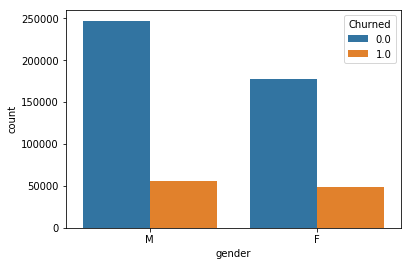

In [41]:
sns.countplot(x="gender", hue="Churned", data=df);

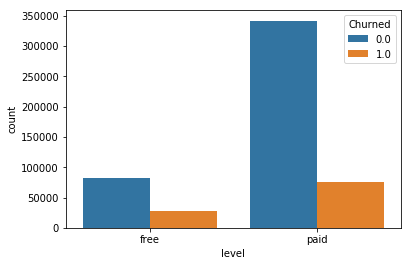

In [42]:
sns.countplot(x="level", hue="Churned", data=df);

Engineering additional features

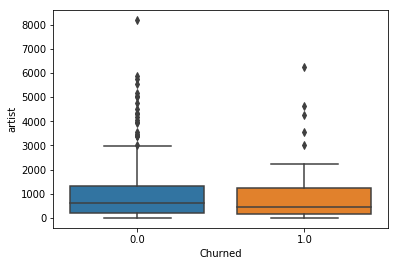

In [43]:
artists=df.groupby('userId').agg({"artist": "count"})
artists1=df.groupby('userId').agg({'Churned' : 'max'})
artists=artists.join(artists1)

sns.boxplot(x="Churned", y='artist', data=artists);

In [44]:
artists=artists.rename(columns={'artists':'artists', 'Churned':'Churnedartists'})

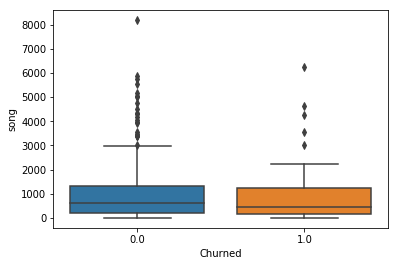

In [45]:
song=df.groupby('userId').agg({"song": "count"})
song1=df.groupby('userId').agg({'Churned' : 'max'})
song=song.join(song1)

sns.boxplot(x="Churned", y= 'song', data=song);


In [46]:
song=song.rename(columns={'song':'song', 'Churned':'Churnedasong'})


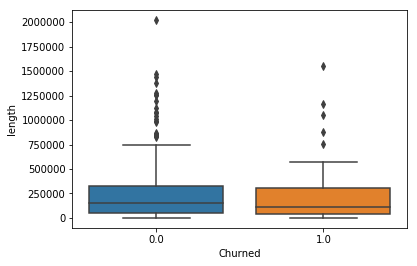

In [47]:
length=df.groupby('userId').agg({"length": "sum"})
length1=df.groupby('userId').agg({'Churned' : 'max'})
length=length.join(length1)

sns.boxplot(x="Churned", y= 'length', data=length)

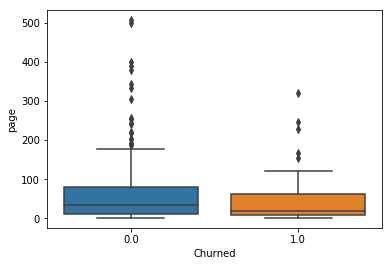

In [48]:
up=df[df['page']=='Thumbs Up'].groupby('userId').agg({"page": "count"})
up1=df.groupby('userId').agg({'Churned' : 'max'})
up=up.join(up1)

sns.boxplot(x="Churned", y= 'page', data=up);

In [49]:
up=up.rename(columns={'page':'up', 'Churned':'Churnedup'})
up.head()

up  Churnedup
userId                
10       17        1.0
100     143        0.0
100001    5        1.0
100002    8        0.0
100003   16        1.0

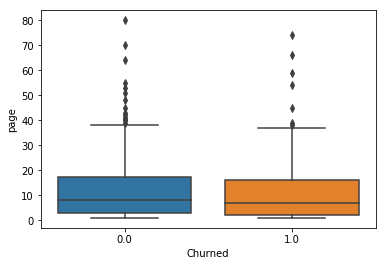

In [50]:
down=df[df['page']=='Thumbs Down'].groupby('userId').agg({"page": "count"})
down1=df.groupby('userId').agg({'Churned' : 'max'})
down=down.join(down1)

sns.boxplot(x="Churned", y='page', data=down);

### Preparation for the model 

In [51]:
down=down.rename(columns={'page':'down', 'Churned':'Churneddown'})
down.head()

down  Churneddown
userId                   
10         1          1.0
100       37          0.0
100001     1          1.0
100002     2          0.0
100003    10          1.0

In [52]:
up.head()

up  Churnedup
userId                
10       17        1.0
100     143        0.0
100001    5        1.0
100002    8        0.0
100003   16        1.0

In [53]:
gender=df.groupby('userId').agg({"gender": "max"})
gender.head()

gender
userId       
10          M
100         M
100001      F
100002      F
100003      F

In [54]:
level=df.groupby('userId').agg({"level": "max"})
level.head()

level
userId      
10      paid
100     paid
100001  free
100002  paid
100003  paid

In [55]:
merged_df=pd.concat([up,down,gender,song, level,artists,length,], axis=1, sort=False)
merged_df=merged_df.drop(['Churnedup','Churneddown','Churnedasong','Churnedartists'],axis=1)
merged_df.head()

up  down gender  song level  artist        length  Churned
10       17.0   1.0      M   360  paid     360   90524.44076      1.0
100     143.0  37.0      M  3382  paid    3382  829748.33112      0.0
100001    5.0   1.0      F    96  free      96   23795.33930      1.0
100002    8.0   2.0      F   137  paid     137   36769.06108      0.0
100003   16.0  10.0      F   661  paid     661  162292.65050      1.0

In [56]:
merged_df.isna().sum()

up          9
down       59
gender      0
song        0
level       0
artist      0
length      0
Churned     0
dtype: int64

In [57]:
merged_df=merged_df.fillna(0)
merged_df.isna().sum()

up         0
down       0
gender     0
song       0
level      0
artist     0
length     0
Churned    0
dtype: int64

Getting Dummies for Gender and level 

In [58]:
merged_df=pd.get_dummies(data=merged_df, columns=['gender', 'level'],drop_first=True )
merged_df.head()

up  down  song  artist        length  Churned  gender_M  level_paid
10       17.0   1.0   360     360   90524.44076      1.0         1           1
100     143.0  37.0  3382    3382  829748.33112      0.0         1           1
100001    5.0   1.0    96      96   23795.33930      1.0         0           0
100002    8.0   2.0   137     137   36769.06108      0.0         0           1
100003   16.0  10.0   661     661  162292.65050      1.0         0           1

## 5. Building the models and testing 

3 approaches will be compared: 
1. Regression model
2. Random forest model 
3. Gradient boosting 

### 1. Regression model

In [59]:
X=merged_df.drop('Churned',axis=1)
y=merged_df['Churned']

In [60]:
X.head()

up  down  song  artist        length  gender_M  level_paid
10       17.0   1.0   360     360   90524.44076         1           1
100     143.0  37.0  3382    3382  829748.33112         1           1
100001    5.0   1.0    96      96   23795.33930         0           0
100002    8.0   2.0   137     137   36769.06108         0           1
100003   16.0  10.0   661     661  162292.65050         0           1

In [61]:
y.head()

10        1.0
100       0.0
100001    1.0
100002    0.0
100003    1.0
Name: Churned, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
# log regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model= LogisticRegression(C=1.0,class_weight='balanced', warm_start=False,
                   tol=0.0001,multi_class='ovr',intercept_scaling=1)

In [66]:
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [67]:
predictions = model.predict(X_test)


In [68]:
print( classification_report(y_test, predictions) )


             precision    recall  f1-score   support

        0.0       0.85      0.66      0.74       102
        1.0       0.38      0.64      0.47        33

avg / total       0.73      0.65      0.67       135



In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[67 35]
 [12 21]]


In [70]:
model.coef_

array([[ -1.27604110e-02,   4.79028124e-02,  -5.77657015e-03,
         -5.77657015e-03,   4.68067593e-05,  -1.37282952e-03,
          1.19482684e-02]])

In [71]:
f1_score(y_test,predictions,average='weighted')

0.67471737675971322

### 2. Random Forest 

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

In [75]:
f1_score(y_test,rfc_pred,average='weighted')

0.65291005291005277

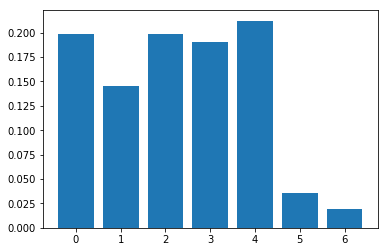

In [76]:
pyplot.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
pyplot.show()

### 3.Gradient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
gbt=GradientBoostingClassifier()
gbt.fit(X_train,y_train)
gbt_pred=gbt.predict(X_test)

In [80]:
f1_score(y_test,gbt_pred,average='weighted')

0.69744346116027522

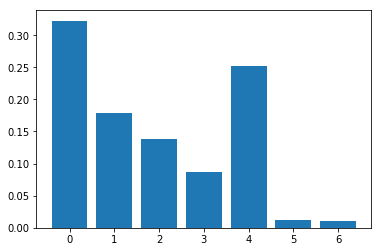

In [81]:
pyplot.bar(range(len(gbt.feature_importances_)), gbt.feature_importances_)
pyplot.show()

In [82]:
X.head()

up  down  song  artist        length  gender_M  level_paid
10       17.0   1.0   360     360   90524.44076         1           1
100     143.0  37.0  3382    3382  829748.33112         1           1
100001    5.0   1.0    96      96   23795.33930         0           0
100002    8.0   2.0   137     137   36769.06108         0           1
100003   16.0  10.0   661     661  162292.65050         0           1

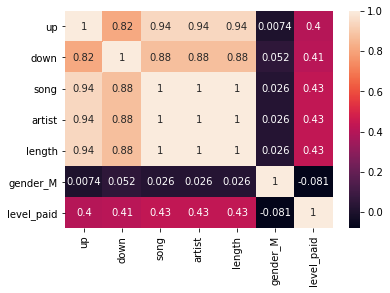

In [84]:
sns.heatmap(X.corr(), annot=True)

End